# <b>hist</b>

<style>
    .warn2 { color: red; }
</style>

This section describes various options available for histogram plots in **fivecentplots**

See the full API https://endangeredoxen.github.io/fivecentplots/0.6.0/api/hist.html#hist

## Setup

Import packages:

In [1]:
import fivecentplots as fcp
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pylab as plt

Read some fake data to generate plots:

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_box.csv')
df.head()

,Batch,Sample,Region,Value,ID
0,101,1,Alpha123,3.5,ID701223A
1,101,1,Alpha123,0.0,ID7700-1222B
2,101,1,Alpha123,3.3,ID701223A
3,101,1,Alpha123,3.2,ID7700-1222B
4,101,1,Alpha123,4.0,ID701223A


Optionally set the design theme (skipping here and using default):

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Simple histogram

### Vertical bars

We calculate a simple histogram with default bin size of 20.

<div class="admonition note">
<p class="admonition-title"></p>
<p>Note that "counts" are automatically calculated based on the data in the "x" column</p>
</div>

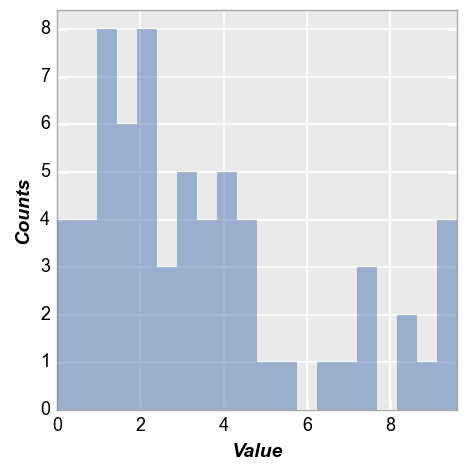

In [4]:
fcp.hist(df, x='Value')

### Horizontal bars

Same data as above but with histogram bars oriented horizontally:

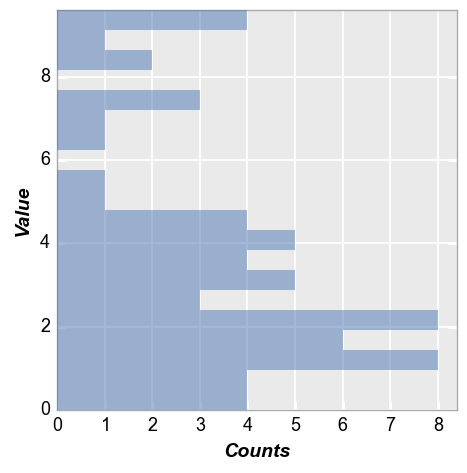

In [5]:
fcp.hist(df, x='Value', horizontal=True)

### Bin counts

We can change the number of bins used via the keyword `hist_bins` or `bins`:

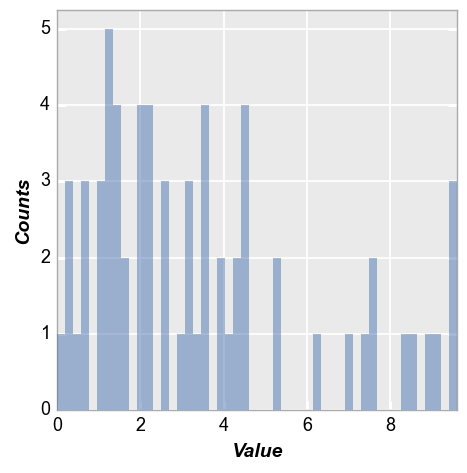

In [6]:
fcp.hist(df, x='Value', bins=50)

## Grouping

### Legend

Add a legend:

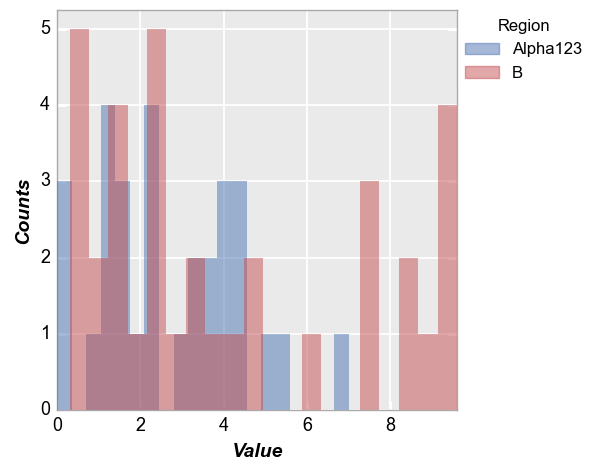

In [7]:
fcp.hist(df, x='Value', legend='Region')

### Row/column plot

Make multiple subplots with different row/column values:

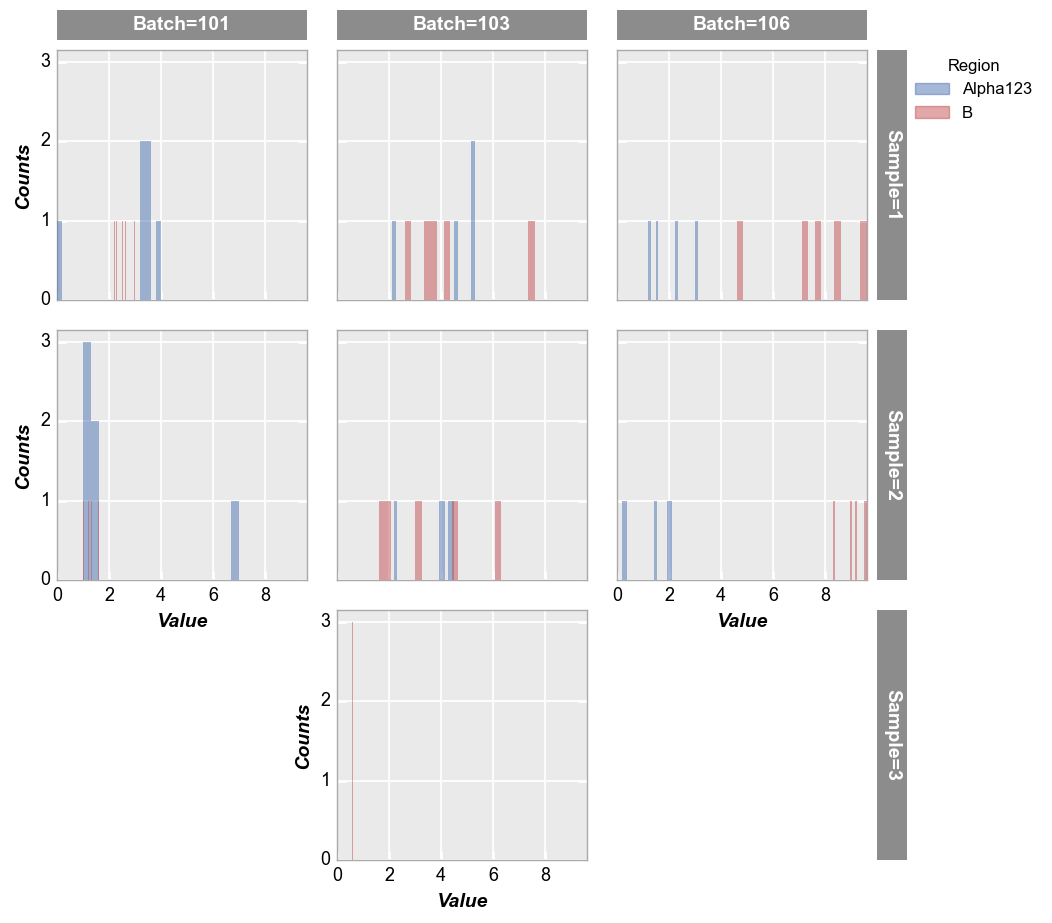

In [8]:
fcp.hist(df, x='Value', legend='Region', col='Batch', row='Sample', ax_size=[250, 250])

### Wrap plot

First we wrap the data using a column from the `DataFrame`:

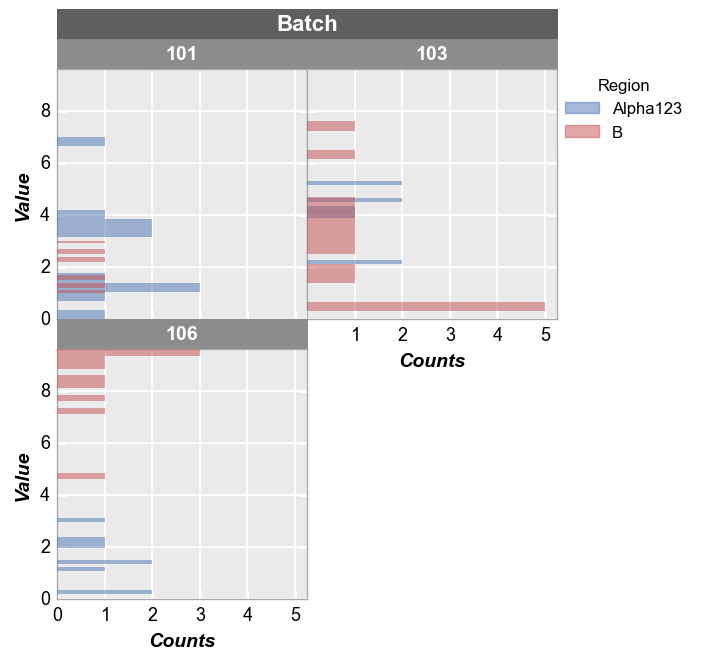

In [9]:
fcp.hist(df, x='Value', legend='Region', wrap='Batch', ax_size=[250, 250], horizontal=True) 

Next we wrap by `x` which means we make a subplot for each x-column name provided.  To illustrate this, we create a couple of new columns in the `DataFrame` that are just multiples of the "Value" column:

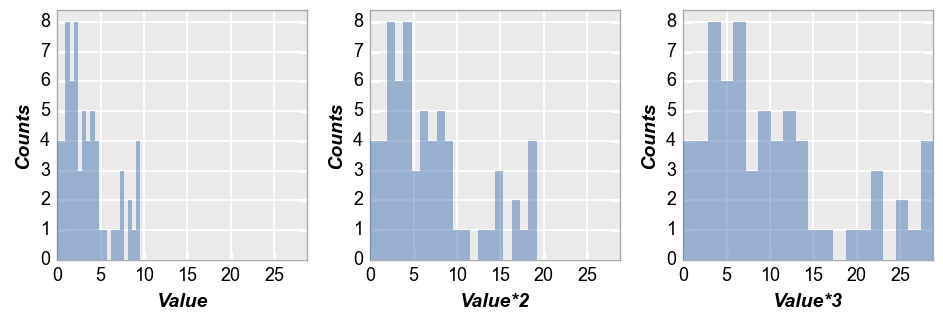

In [10]:
df['Value*2'] = 2*df['Value']
df['Value*3'] = 3*df['Value']
fcp.hist(df, x=['Value', 'Value*2', 'Value*3'], wrap='x', ncol=3, ax_size=[250, 250])

## Kernel density estimator

We can overlay a kernel density estimation curve on the histogram using keyword `kde=True`.  These curves can be styled using standard line `Element` parameters prefixed by `kde_`:

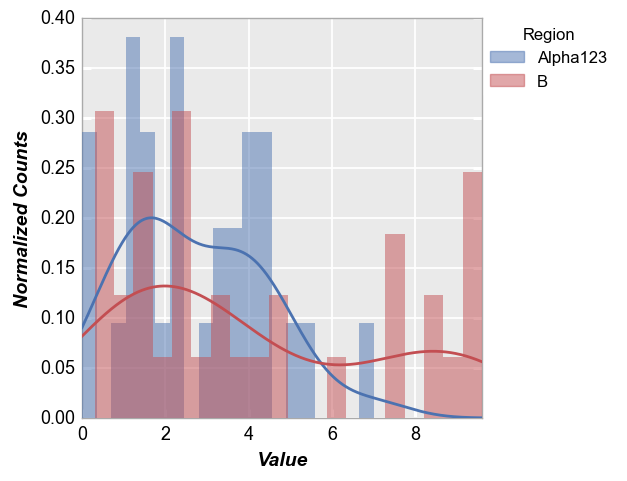

In [11]:
fcp.hist(df, x='Value', legend='Region', kde=True, kde_width=2)

## Other options

A couple of other options are available to present histogram data.  Starting with our basic example from section 2:

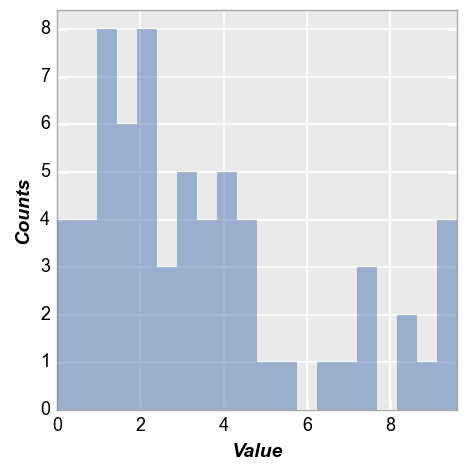

In [12]:
fcp.hist(df, x='Value')

### Cumulative

Now we enable "cumulative" mode so that each subsequent bin contains the total number of counts from the previous bins:

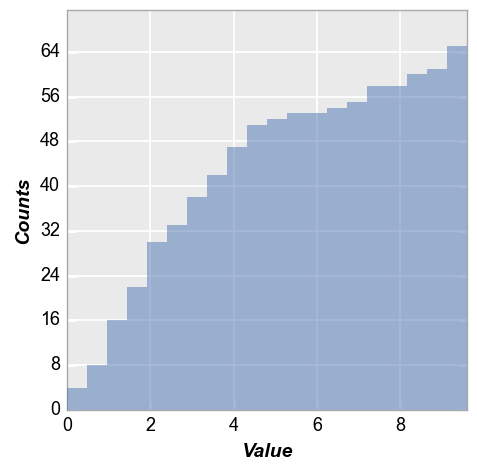

In [13]:
fcp.hist(df, x='Value', hist_cumulative=True)

### Normalize

Next we enable `hist_normalize=True` to normalize the histogram such that each bin's raw count is divided by the total number of counts and the bin width so that the area under the histogram integrates to 1.

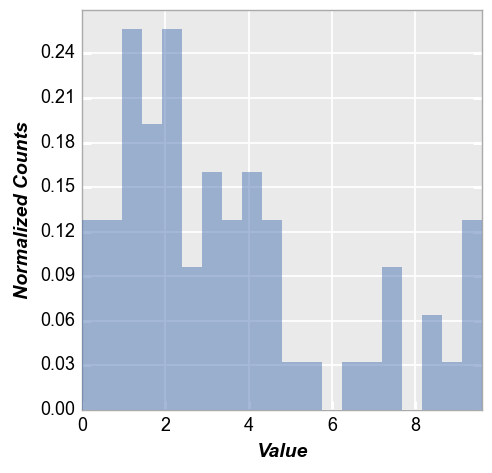

In [14]:
fcp.hist(df, x='Value', hist_normalize=True)

## Images

`hist` plots in <b>fivecentplots</b> can also be used generate histograms of pixel values from raw images (helpful for image sensor / camera engineering activities).  Options are also provided to split these raw images by color-filter array (CFA) pattern.  When plotting histograms of images, it is assumed that each digital number in the image data should be represented by its own bin so the number of bins is auto-calculated based on the min/max pixel values in the image data.



### Mono
First, consider a simple example of a 300x300 gray patch with all pixel values near the mid-level of a 10-bit camera (no color-filter array).

In [15]:
h, w = 300, 300
img = (np.ones([h, w]) * (2**10 - 1) / 2).astype(np.uint16)
img

array([[511, 511, 511, ..., 511, 511, 511],
       [511, 511, 511, ..., 511, 511, 511],
       [511, 511, 511, ..., 511, 511, 511],
       ...,
       [511, 511, 511, ..., 511, 511, 511],
       [511, 511, 511, ..., 511, 511, 511],
       [511, 511, 511, ..., 511, 511, 511]], dtype=uint16)

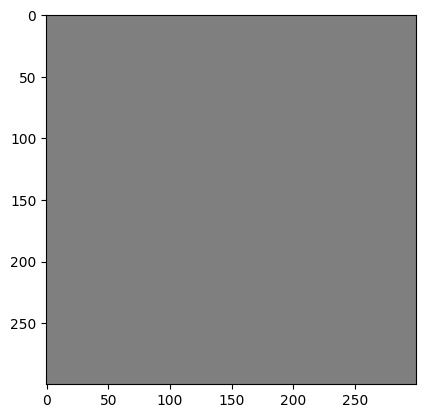

In [16]:
plt.imshow(img, cmap='gray', vmin=0, vmax=2**10)

In this case, our histogram is a single point with 300 * 300 counts:

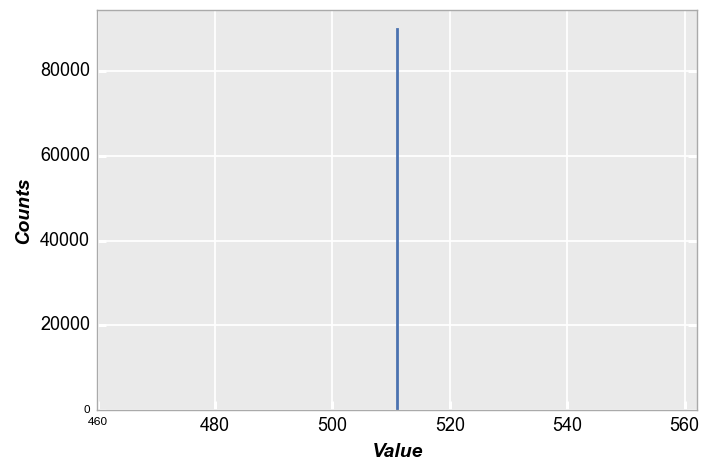

In [17]:
fcp.hist(img, markers=False, ax_size=[600, 400], line_width=2)

<div class="admonition note">
<p class="admonition-title"></p>
<p>Alert!  What just happened?  If you were paying close attention you noticed we did not pass a `DataFrame` to the `hist` plot.  This is a sneaky, under-the-table trick that exists to make life easier when using `hist` or `imshow` with for 2D `numpy.ndarrays`.  These arrays are converted into `DataFrames` behind the scenes so you don't have to take an extra step.  This can be our dirty little secret...</p>
</div>

Now let's multiplying our patch by a 2D Gaussian to approximate lens shading:

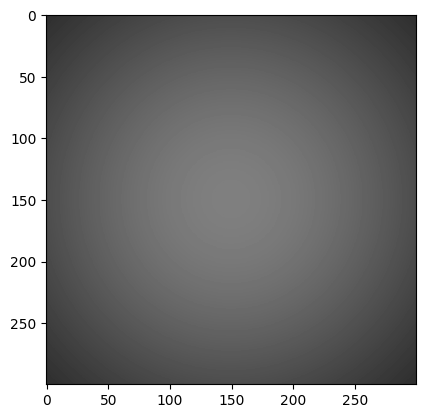

In [18]:
x, y = np.meshgrid(np.linspace(-1,1,300), np.linspace(-1,1,300))
dst = np.sqrt(x*x+y*y)
sigma = 1
muu = 0.001
 
gauss = np.exp(-( (dst-muu)**2 / ( 2.0 * sigma**2 ) ) )
img2 = (gauss * img).astype(np.uint16)
plt.imshow(img2, cmap='gray', vmin=0, vmax=2**10)

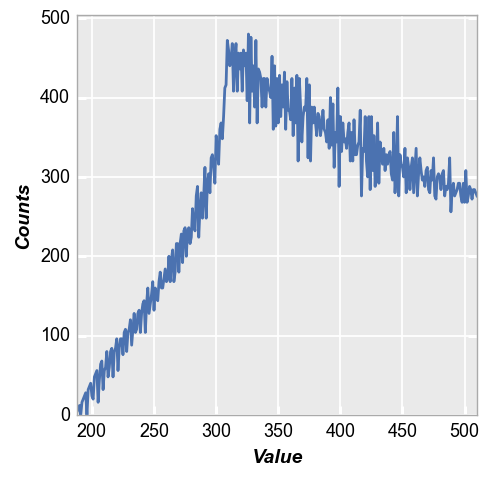

In [19]:
fcp.hist(img2, markers=False, line_width=2)

### RGB

Now lets mock-up a Bayer array for a light blue color patch and show how <b>fivecentplots</b> allows you to easily split the histogram into distinct color planes (based on a CFA pattern).  Here we'll assume "GRBG":

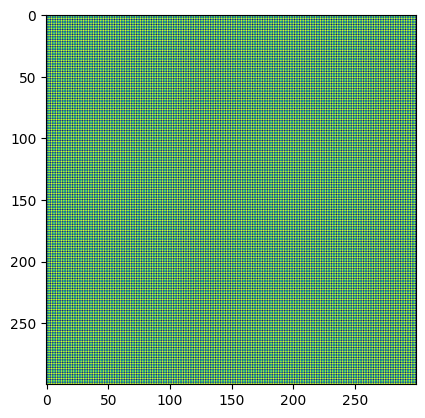

In [20]:
img_rgb = np.zeros([300, 300]).astype(np.uint16)
img_rgb[::2, ::2] = 180  # green_red
img_rgb[1::2, 1::2] = 180  # green_blue
img_rgb[::2, 1::2] = 10
img_rgb[1::2, ::2] = 255
plt.imshow(img_rgb)

Which upon demosaicing would give:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


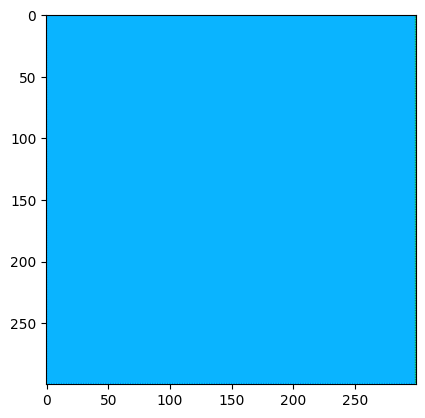

In [21]:
import colour_demosaicing
plt.imshow(colour_demosaicing.demosaicing_CFA_Bayer_bilinear(np.array(img_rgb), 'GRBG').astype(np.uint16))

By default, the `hist` function pays no mind to any differences in image pixels due to CFA:

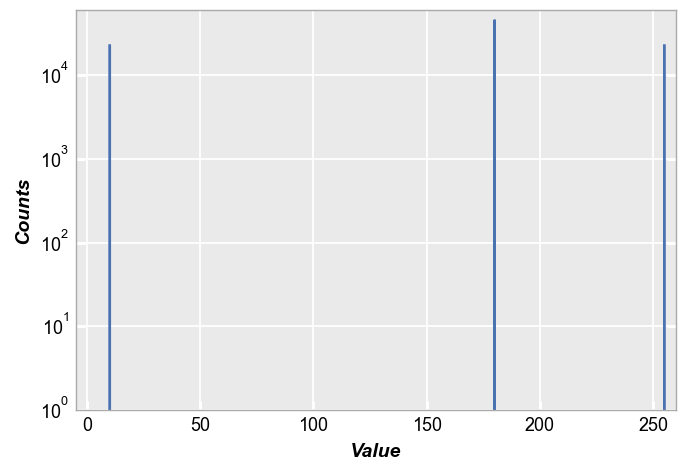

In [22]:
fcp.hist(img_rgb, markers=False, ax_scale='logy', ax_size=[600, 400], line_width=2, xmin=-5, xmax=260, ymin=1, ymax=60000)

However, we can specify a CFA When plotting the histogram using the keyword `cfa="grbg"` and then legend by color plane (for convenience, we also invoke the special color scheme shortcut `fcp.BAYER` to color the planes according to their filter color).  Notice in this example that the "gr" and "gb" pixels overlap.

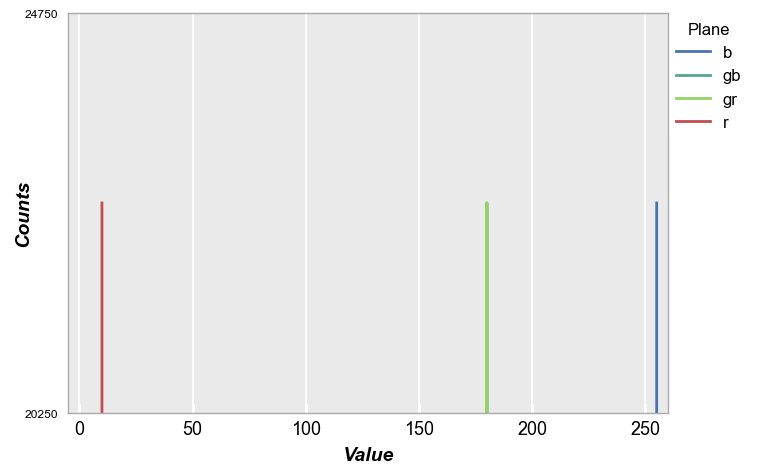

In [23]:
fcp.hist(img_rgb, markers=False, ax_scale='logy', ax_size=[600, 400], legend='Plane', cfa='grbg', line_width=2, xmin=-5, xmax=260, 
         colors=fcp.BAYER)

Now lets add some shading and noise to make a more meaningful histogram.  This results in the color patch below.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


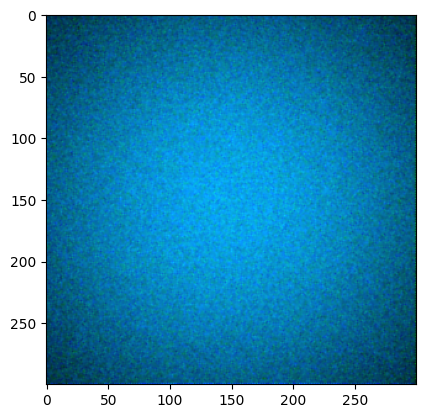

In [24]:
# Gaussian shading
x, y = np.meshgrid(np.linspace(-1,1,300), np.linspace(-1,1,300))
dst = np.sqrt(x*x+y*y)
sigma = 1
muu = 0.001
gauss = np.exp(-( (dst-muu)**2 / ( 2.0 * sigma**2 ) ) )
img_rgb2 = (gauss * img_rgb).astype(float)

# Random noise
img_rgb2[::2, ::2] += np.random.normal(-0.1*img_rgb2[::2, ::2].mean(), 0.1*img_rgb2[::2, ::2].mean(), img_rgb2[::2, ::2].shape)
img_rgb2[1::2, ::2] += np.random.normal(-0.1*img_rgb2[1::2, ::2].mean(), 0.1*img_rgb2[1::2, ::2].mean(), img_rgb2[1::2, ::2].shape)
img_rgb2[1::2, 1::2] += np.random.normal(-0.1*img_rgb2[1::2, 1::2].mean(), 0.1*img_rgb2[1::2, 1::2].mean(), img_rgb2[1::2, 1::2].shape)
img_rgb2[::2, 1::2] += np.random.normal(-0.1*img_rgb2[::2, 1::2].mean(), 0.1*img_rgb2[::2, 1::2].mean(), img_rgb2[::2, 1::2].shape)
img_rgb2 = img_rgb2.astype(np.uint16)
plt.imshow(colour_demosaicing.demosaicing_CFA_Bayer_bilinear(np.array(img_rgb2), 'GRBG').astype(np.uint16))

Again, invoking the `cfa` keyword with legending we get the following:

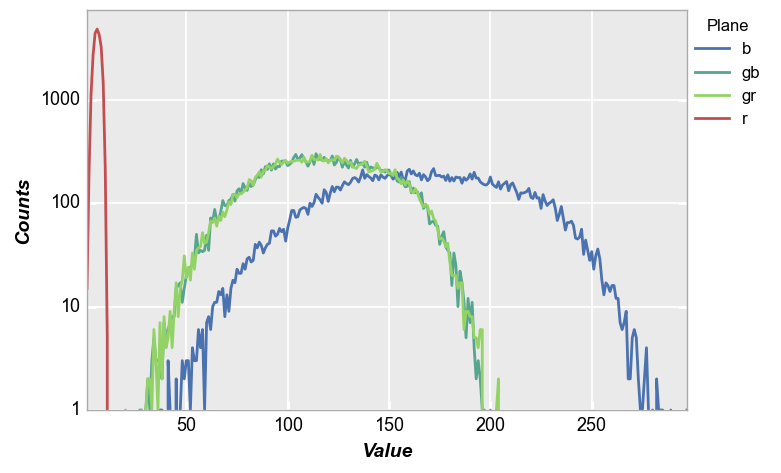

In [25]:
fcp.hist(img_rgb2, markers=False, ax_scale='logy', ax_size=[600, 400], legend='Plane', cfa='grbg', line_width=2, colors=fcp.BAYER)

While this example is a bit contrived, it demonstrates the power of <b>fivecentplots</b> for raw image analysis in industries using image sensors or cameras.

## PDF

<b>fivecentplots</b> histograms can be converted to probability density functions inline using the keyword `pdf=True`.  Here we use the shaded color patch with noise from above for our input.

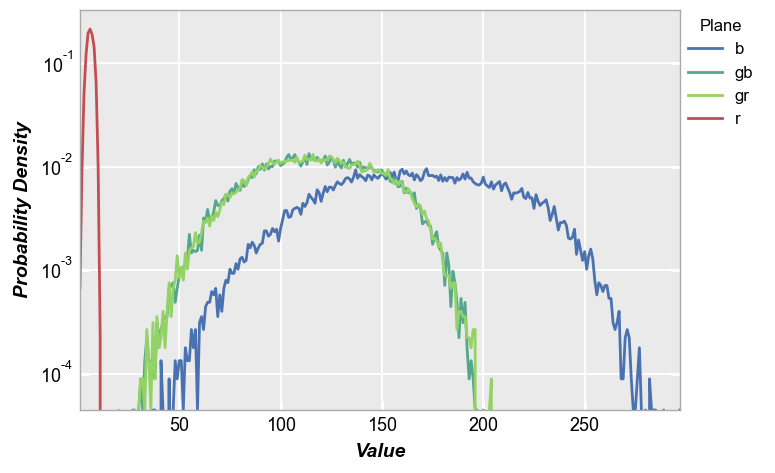

In [26]:
fcp.hist(img_rgb2, markers=False, ax_scale='logy', ax_size=[600, 400], legend='Plane', cfa='grbg', line_width=2, colors=fcp.BAYER, pdf=True)

## CDF

<b>fivecentplots</b> histograms can also be converted to cumulative distribution functions inline using the keyword `pdf=True`.  Again, we use the shaded color patch with noise from above for our input.  With no color plane separation:

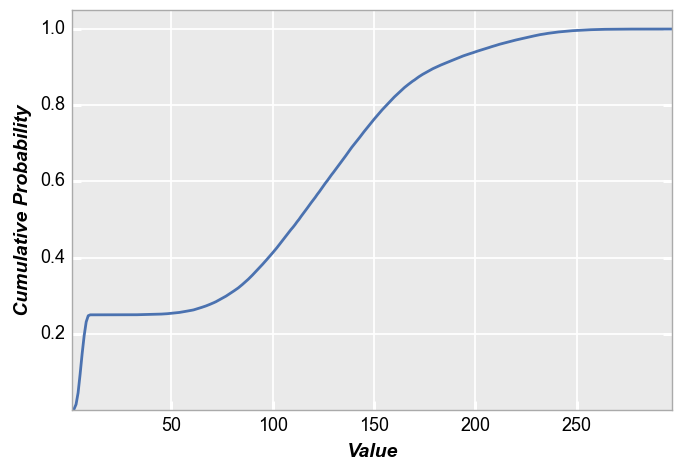

In [27]:
fcp.hist(img_rgb2, markers=False, ax_size=[600, 400], line_width=2, colors=fcp.BAYER, cdf=True)

With color plane separation:

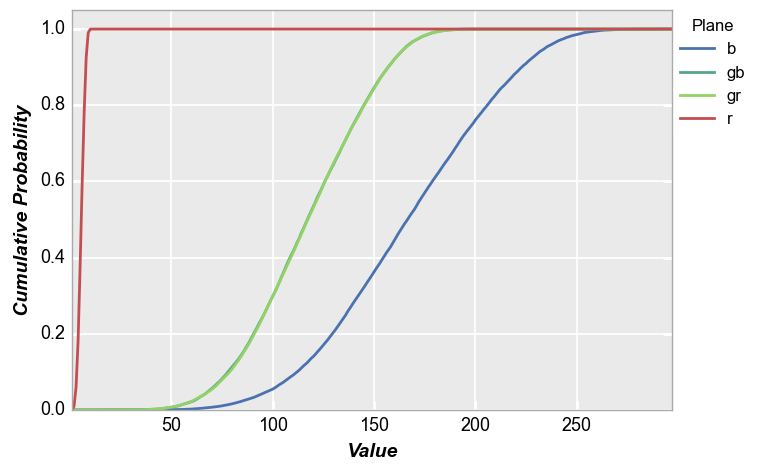

In [28]:
fcp.hist(img_rgb2, markers=False, ax_size=[600, 400], legend='Plane', cfa='grbg', line_width=2, colors=fcp.BAYER, cdf=True)

## Styles

### Bar style

#### Colors

The bar edge and fill colors can be controlled by kwargs:

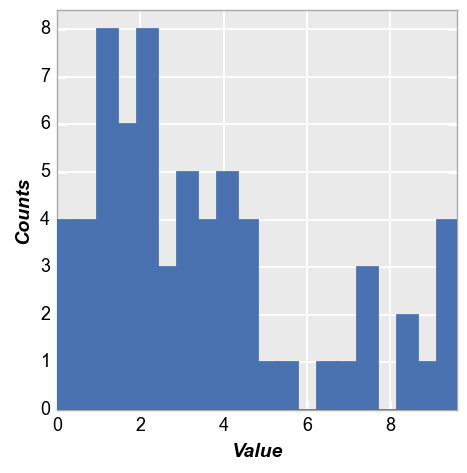

In [29]:
fcp.hist(df, x='Value', hist_edge_color='#555555', hist_edge_width=2, hist_fill_alpha=1, hist_fill_color='#FF0000')

#### Alignment

The alignment of the bars relative to the ticks on the x-axis can be adjusted.  Options include: {'left', 'mid', 'right'}

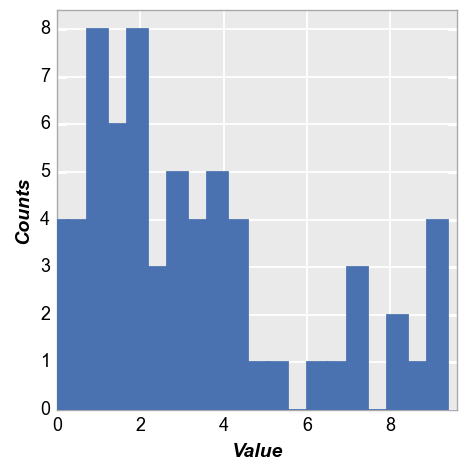

In [30]:
fcp.hist(df, x='Value', hist_edge_color='#555555', hist_edge_width=2, hist_fill_alpha=1, hist_fill_color='#FF0000', 
         hist_align='left')

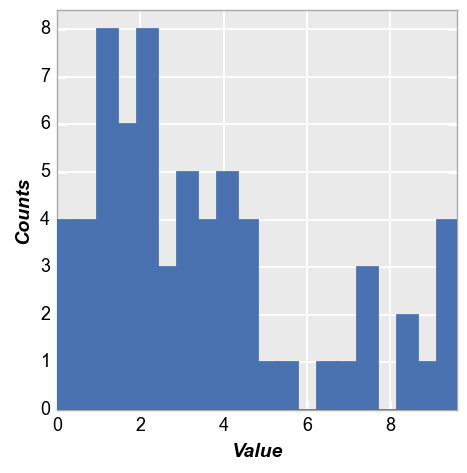

In [31]:
fcp.hist(df, x='Value', hist_edge_color='#555555', hist_edge_width=2, hist_fill_alpha=1, hist_fill_color='#FF0000', 
         hist_align='mid')

#### Width

The relative width of the bars can be controlled by the keyword `hist_rwidth`:

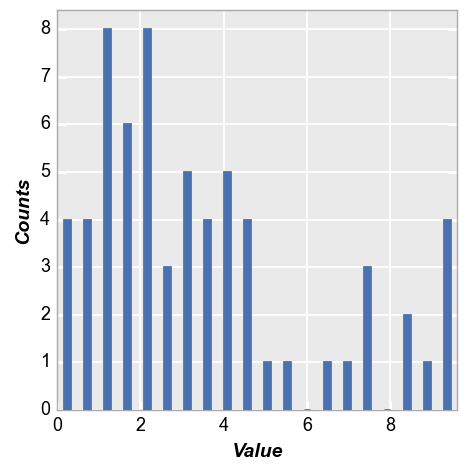

In [32]:
fcp.hist(df, x='Value', hist_edge_color='#555555', hist_edge_width=2, hist_fill_alpha=1, hist_fill_color='#FF0000', 
         hist_align='mid', hist_rwidth=0.3)

### fcp.HIST

When plotting histograms from images, a helpful shortcut dictionary of useful keywords args can be utilized via `fcp.HIST`:

In [33]:
fcp.HIST

{'ax_scale': 'logy', 'markers': False, 'line_width': 2, 'preset': 'HIST'}

Drawing on the example above, this shortcut would be used as follows:

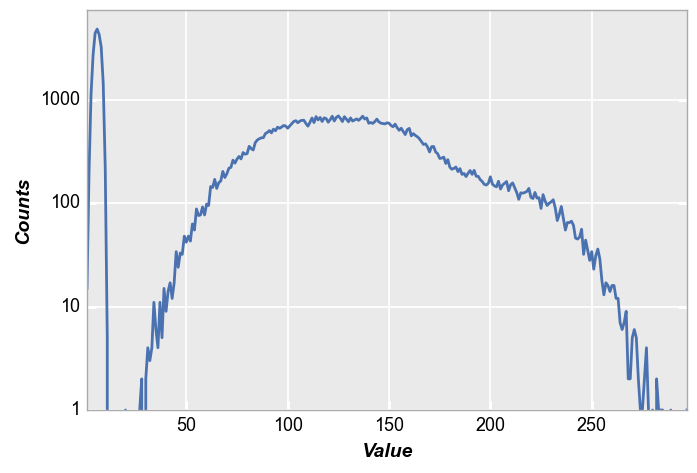

In [34]:
fcp.hist(img_rgb2, ax_size=[600, 400], **fcp.HIST)

Compared to without the shortcut:

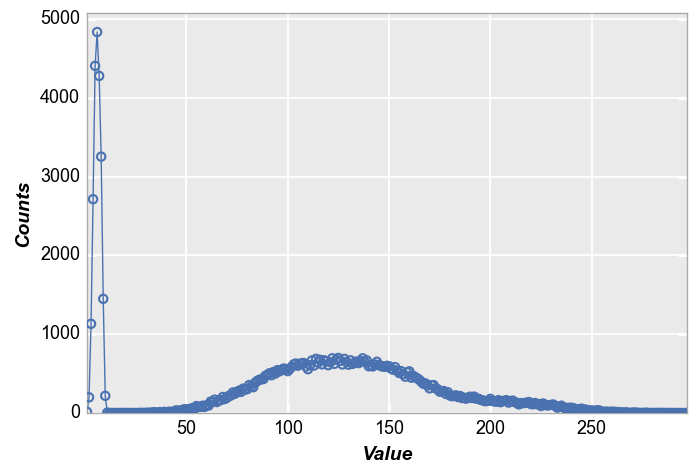

In [35]:
fcp.hist(img_rgb2, ax_size=[600, 400])